In [1]:
import sys
sys.path.append('..')

In [ ]:
import math 

from neural_networks_from_scratch.models.mlp import MLP
from neural_networks_from_scratch.models.mlp.activation_functions import Softmax
from neural_networks_from_scratch.training.model_training import train_model


In [3]:
import string

lowercase_letters = string.ascii_lowercase
lowercase_letters

'abcdefghijklmnopqrstuvwxyz'

In [4]:
training_text = """I met a traveller from an antique land
Who said: Two vast and trunkless legs of stone
Stand in the desart. Near them, on the sand,
Half sunk, a shattered visage lies, whose frown,
And wrinkled lip, and sneer of cold command,
Tell that its sculptor well those passions read
Which yet survive, stamped on these lifeless things,
The hand that mocked them and the heart that fed:
And on the pedestal these words appear:
"My name is Ozymandias, King of Kings:
Look on my works, ye Mighty, and despair!"
No thing beside remains. Round the decay
Of that colossal wreck, boundless and bare
The lone and level sands stretch far away."""
# From https://en.wikipedia.org/wiki/Ozymandias#Text

training_text = training_text.lower()
training_text

'i met a traveller from an antique land\nwho said: two vast and trunkless legs of stone\nstand in the desart. near them, on the sand,\nhalf sunk, a shattered visage lies, whose frown,\nand wrinkled lip, and sneer of cold command,\ntell that its sculptor well those passions read\nwhich yet survive, stamped on these lifeless things,\nthe hand that mocked them and the heart that fed:\nand on the pedestal these words appear:\n"my name is ozymandias, king of kings:\nlook on my works, ye mighty, and despair!"\nno thing beside remains. round the decay\nof that colossal wreck, boundless and bare\nthe lone and level sands stretch far away.'

In [5]:
possible_chars = sorted(list(set(training_text)))
possible_chars

['\n',
 ' ',
 '!',
 '"',
 ',',
 '.',
 ':',
 'a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'y',
 'z']

In [6]:
binary_str_length = len(format(len(possible_chars), 'b'))
binary_str_length

5

In [7]:
def binary_vec_encode(letter):
    return [int(d) for d in format(possible_chars.index(letter), 'b').zfill(binary_str_length)]

def binary_vec_encode_sequence(sequence):
    return [binary_vec_encode(letter) for letter in sequence]

def binary_vec_decode(vec):
    return possible_chars[int("".join([str(d) for d in vec]), 2)]

def binary_vec_decode_sequence(sequence):
    return "".join([binary_vec_decode(vec) for vec in sequence])

def binary_vec_encode_sequence_concat(sequence):
    l = []
    for l_ in binary_vec_encode_sequence(sequence):
        l.extend(l_)
    return l


In [8]:
SEQUENCE_LENGTH = 5
# N_TRAIN_SAMPLES = 200

In [9]:
possible_start_indices = list(range(len(training_text) - SEQUENCE_LENGTH - 1))
x, y_true = zip(*[
    (
        binary_vec_encode_sequence_concat(
            training_text[possible_start_indices[i]:possible_start_indices[i] + SEQUENCE_LENGTH]
        ),
        [int(j == possible_chars.index(training_text[i+1])) for j in range(len(possible_chars))]
    ) for i in possible_start_indices
])
x, y_true = list(x), list(y_true)
x, y_true

([[0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1],
  [0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1],
  [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1],
  [0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1],
  [1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1],
  [0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1],
  [0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
  [0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1],
  [1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1],
  [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1],
  [0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1],
  [1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1],
  [0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1

In [10]:
len(x), len(y_true)

(618, 618)

In [11]:
model = MLP(
    n_inputs=len(x[0]),
    layers=(100, len(possible_chars)),
    final_activation_function=Softmax()
)

/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/anton/dev/.virtual_envs/default_env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


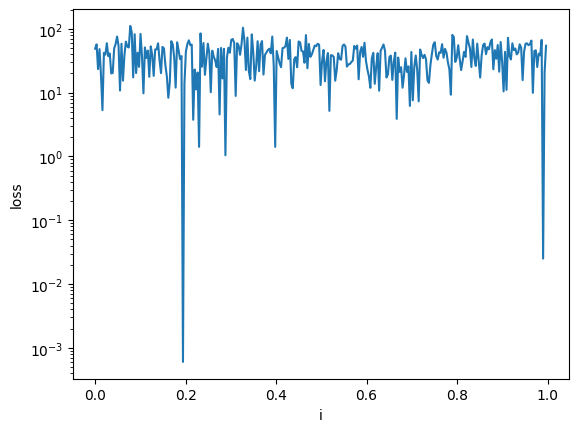

In [12]:

epochs = 1


def _clean_pred(y):
    return y.values if not isinstance(y, list) else y

def special_loss(
    y_true,
    y_pred,
):
    y_true = _clean_pred(y_true)
    y_pred = _clean_pred(y_pred)

    sum_ = 0
    for y_true_sample, y_pred_sample in zip(y_true, y_pred):
        for y_true_logit, y_pred_logit in zip(_clean_pred(y_true_sample), _clean_pred(y_pred_sample)):
            sum_ -= y_true_logit * y_pred_logit.applyfunc(
                func=math.log,
                func_name="ln",
                grad_func=lambda self_var, downstream_var, other_var: 1.0/self_var
            )

    return sum_ / len(y_true)


loss, train_df = train_model(
    model=model,
    x=x,
    y_true=y_true,
    epochs=epochs,
    batch_size=2,
    record_steps=1,
    learning_rate=1e-1,
    learning_rate_decay=0.5,
    loss_function=special_loss,
    plot=True,
)

In [13]:
def get_word_from_softmax_output(softmax_outputs):
    res = []
    for softmax_output in softmax_outputs:
        vals = [gvar.val for gvar in softmax_output.values]
        res.append(
            possible_chars[vals.index(max(vals))]
        )
    return res


input_text_ = training_text[possible_start_indices[0]:possible_start_indices[0] + SEQUENCE_LENGTH]
print(input_text_, end="")
for i in range(100):
    next_letter = get_word_from_softmax_output(
        model.forward([binary_vec_encode_sequence_concat(
            input_text_
        )])
    )[0]
    print(next_letter, end="")
    input_text_ = input_text_[1:] + next_letter

i metknndrnnhd nnh.:nndh nnhl:nhl: zk: hk.lz i z.h d zk:.d.l zl:nhl: zk: hk.lz i z.h d zk:.d.l zl:nhl: zk

OK, that obviously didn't work very well.

Note that I couldn't increase the batch size or the model size very much because the gradient tracking meant that I ran out of RAM